
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

## Importar librerias 

In [0]:
import pandas as pd               
import numpy as np                
import pyspark                    
from pyspark.sql import SparkSession   
from pyspark.sql import functions as F 
from pyspark.sql.types import *       

## Lectura de archivos

In [0]:
# CSV options
# File location and type
file_location = "/FileStore/tables/open_meteo_13_67S76_13W127m.csv"
file_type = "csv"
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","
skip_rows = 3  # Salta las dos primeras filas

# Read the CSV file starting from the third row
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option("skipRows", skip_rows) \
  .load(file_location)

# Create a temporary view or table
temp_table_name = "open_meteo_13_67S76_13W127m_csv"
df.createOrReplaceTempView(temp_table_name)

display(df)

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8
time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),snowfall (cm),weather_code (wmo code),soil_temperature_0_to_7cm (°C),is_day ()
2022-01-01T00:00,18.4,94,17.3,0.00,0.00,1,23.7,0
2022-01-01T01:00,18.1,96,17.4,0.00,0.00,0,23.1,0
2022-01-01T02:00,17.6,98,17.3,0.00,0.00,2,22.6,0
2022-01-01T03:00,17.4,98,17.1,0.00,0.00,2,22.2,0
2022-01-01T04:00,17.4,97,16.9,0.00,0.00,1,21.8,1
2022-01-01T05:00,19.1,88,17.1,0.00,0.00,1,23.0,1
2022-01-01T06:00,20.4,81,17.0,0.00,0.00,3,24.2,1
2022-01-01T07:00,21.7,73,16.7,0.00,0.00,1,26.0,1
2022-01-01T08:00,22.5,70,16.7,0.00,0.00,0,28.6,1


In [0]:
df.describe().show(truncate=False)

+-------+----------------+-------------------+------------------------+------------------+-------------------+-------------+-----------------------+------------------------------+------------------+
|summary|_c0             |_c1                |_c2                     |_c3               |_c4                |_c5          |_c6                    |_c7                           |_c8               |
+-------+----------------+-------------------+------------------------+------------------+-------------------+-------------+-----------------------+------------------------------+------------------+
|count  |21241           |21241              |21241                   |21241             |21241              |21241        |21241                  |21241                         |21241             |
|mean   |null            |20.785174199623402 |73.25767419962335       |15.44480225988701 |0.00249058380414313|0.0          |1.196280602636535      |27.938196798493482            |0.4997645951035782|
|stdd

## Resumen estadisticos.

In [0]:
from pyspark.sql.functions import col

# Seleccionamos las columnas numéricas
numeric_cols = ["_c1", "_c2", "_c3", "_c4", "_c5"]

# Creamos un resumen estadístico
summary = df.select(numeric_cols).summary(
    "count", "mean", "stddev", "min", "25%", "50%", "75%", "max"
)

# Mostramos el resultado
display(summary)

summary,_c1,_c2,_c3,_c4,_c5
count,21241,21241,21241,21241,21241
mean,20.785174199623402,73.25767419962335,15.44480225988701,0.00249058380414313,0.0
stddev,4.315238527792253,14.710020563604209,2.6096636696406343,0.04404253842866764,0.0
min,11.1,100,10.0,0.00,0.00
25%,17.6,61.0,13.4,0.0,0.0
50%,20.7,74.0,15.4,0.0,0.0
75%,23.7,86.0,17.5,0.0,0.0
max,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),snowfall (cm)


## Tipos de datos

In [0]:
# 1. Ver los tipos de datos actuales
print("Tipos de datos actuales en PySpark:")
df.printSchema()

Tipos de datos actuales en PySpark:
root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)



## Renombramos las columnas

In [0]:
# Renombramos las columnas para mejor comprensión
df_renamed = df.select(
    col("_c0").alias("time"),
    col("_c1").alias("temperature_2m"),
    col("_c2").alias("relative_humidity"),
    col("_c3").alias("dew_point"),
    col("_c4").alias("precipitation"),
    col("_c5").alias("snowfall"),
    col("_c6").alias("weather_code")
)

# Ahora el describe con nombres más legibles
display(df_renamed.select(
    "temperature_2m", 
    "relative_humidity", 
    "dew_point", 
    "precipitation", 
    "snowfall"
).summary())

summary,temperature_2m,relative_humidity,dew_point,precipitation,snowfall
count,21241,21241,21241,21241,21241
mean,20.785174199623402,73.25767419962335,15.44480225988701,0.00249058380414313,0.0
stddev,4.315238527792253,14.710020563604209,2.6096636696406343,0.04404253842866764,0.0
min,11.1,100,10.0,0.00,0.00
25%,17.6,61.0,13.4,0.0,0.0
50%,20.7,74.0,15.4,0.0,0.0
75%,23.7,86.0,17.5,0.0,0.0
max,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),snowfall (cm)


## Elaboracion de tablas de frecuencia y graficos estadisticos

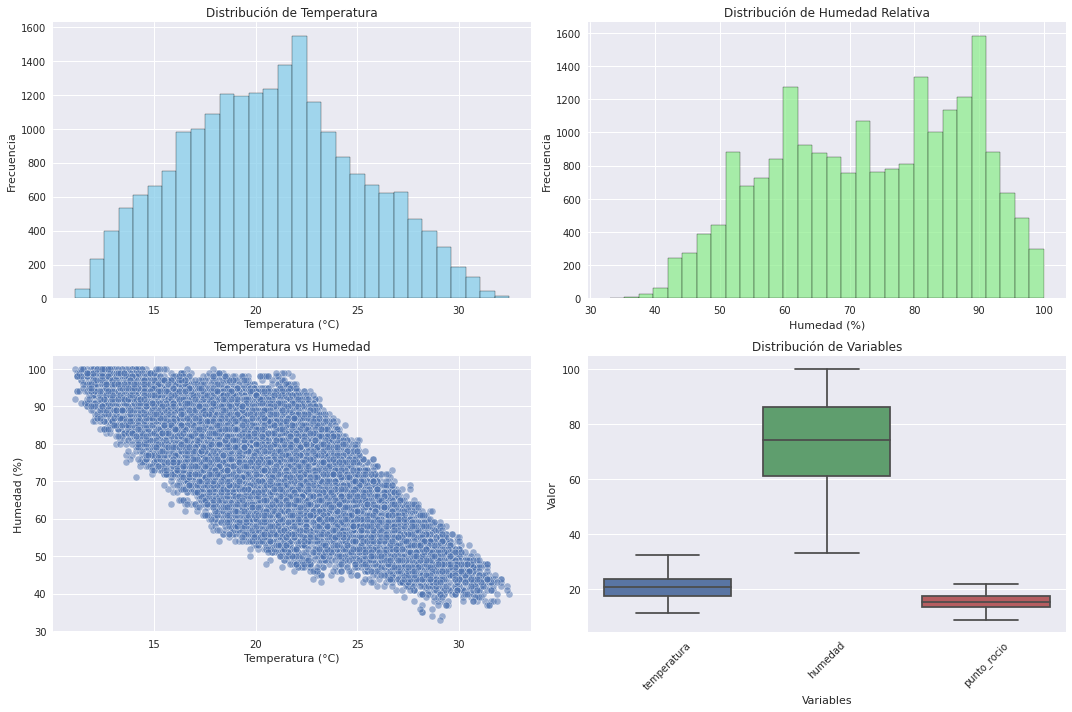

In [0]:
from pyspark.sql.functions import col, count, desc, round, hour, date_format, corr, avg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Estructura de datos mejorada
df_clean = df.select(
    col("_c0").alias("timestamp"),
    round(col("_c1"), 2).alias("temperatura"),
    round(col("_c2"), 2).alias("humedad"),
    round(col("_c3"), 2).alias("punto_rocio"),
    col("_c4").alias("precipitacion"),
    col("_c5").alias("nevada"),
    col("_c6").alias("codigo_tiempo")
)

# Convertir a Pandas para visualizaciones
pandas_df = df_clean.toPandas()

# Configurar el estilo de las visualizaciones
plt.style.use('seaborn')
fig = plt.figure(figsize=(15, 10))

# 1. Histograma de temperatura
plt.subplot(2, 2, 1)
sns.histplot(data=pandas_df, x='temperatura', bins=30, color='skyblue')
plt.title('Distribución de Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')

# 2. Histograma de humedad
plt.subplot(2, 2, 2)
sns.histplot(data=pandas_df, x='humedad', bins=30, color='lightgreen')
plt.title('Distribución de Humedad Relativa')
plt.xlabel('Humedad (%)')
plt.ylabel('Frecuencia')

# 3. Scatter plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=pandas_df, x='temperatura', y='humedad', alpha=0.5)
plt.title('Temperatura vs Humedad')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Humedad (%)')

# 4. Boxplot usando seaborn
plt.subplot(2, 2, 4)
data_to_plot = pd.melt(pandas_df[['temperatura', 'humedad', 'punto_rocio']])
sns.boxplot(x='variable', y='value', data=data_to_plot)
plt.title('Distribución de Variables')
plt.xlabel('Variables')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.tight_layout()
display()


In [0]:
# Estadísticas descriptivas básicas
stats_detail = pandas_df[['temperatura', 'humedad', 'punto_rocio']].describe()
display(stats_detail)

temperatura,humedad,punto_rocio
21240.0,21240.0,21240.0
20.785174199623352,73.25767419962335,15.444802259887005
4.315238527792249,14.71002056360423,2.6096636696406286
11.1,33.0,8.8
17.6,61.0,13.4
20.7,74.0,15.4
23.7,86.0,17.5
32.5,100.0,21.8


## Deteccion de outliers

In [0]:

# Análisis de valores atípicos
def detect_outliers_simple(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    return {
        'variable': column,
        'cantidad_outliers': outliers_count,
        'porcentaje_outliers': np.round(outliers_count / len(df) * 100, 2),
        'rango_normal': f'[{np.round(lower_bound, 2)}, {np.round(upper_bound, 2)}]'
    }

# Analizar outliers para cada variable
variables = ['temperatura', 'humedad', 'punto_rocio']
outliers_results = [detect_outliers_simple(pandas_df, var) for var in variables]
outliers_df = pd.DataFrame(outliers_results)
display(outliers_df)

# Mostrar correlaciones
correlation_matrix = pandas_df[['temperatura', 'humedad', 'punto_rocio']].corr().round(2)
display(correlation_matrix)

variable,cantidad_outliers,porcentaje_outliers,rango_normal
temperatura,0,0.0,"[8.45, 32.85]"
humedad,0,0.0,"[23.5, 123.5]"
punto_rocio,0,0.0,"[7.25, 23.65]"


temperatura,humedad,punto_rocio
1.0,-0.78,0.6
-0.78,1.0,0.04
0.6,0.04,1.0


Tipos de datos actuales en PySpark:
root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)

